In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
! unzip "/content/drive/My Drive/Dataset_orgImg/orgImg.zip" -d "/content/raw_data"

Archive:  /content/drive/My Drive/Dataset_orgImg/orgImg.zip
   creating: /content/raw_data/orgImg/
  inflating: /content/raw_data/__MACOSX/._orgImg  
   creating: /content/raw_data/orgImg/NorthernRenaiss/
  inflating: /content/raw_data/__MACOSX/orgImg/._NorthernRenaiss  
  inflating: /content/raw_data/orgImg/.DS_Store  
  inflating: /content/raw_data/__MACOSX/orgImg/._.DS_Store  
   creating: /content/raw_data/orgImg/rococo/
  inflating: /content/raw_data/__MACOSX/orgImg/._rococo  
   creating: /content/raw_data/orgImg/highRenaiss/
  inflating: /content/raw_data/__MACOSX/orgImg/._highRenaiss  
   creating: /content/raw_data/orgImg/Ukiyo/
  inflating: /content/raw_data/__MACOSX/orgImg/._Ukiyo  
   creating: /content/raw_data/orgImg/impress/
  inflating: /content/raw_data/__MACOSX/orgImg/._impress  
   creating: /content/raw_data/orgImg/postImpress/
  inflating: /content/raw_data/__MACOSX/orgImg/._postImpress  
  inflating: /content/raw_data/orgImg/NorthernRenaiss/portraits-of-willem-mor

In [4]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image

def load_image_data():
    data_path = '/content/raw_data/orgImg'
    
    classes = {'NorthernRenaiss':0, 'Ukiyo':1, 'highRenaiss':2, 'impress':3, 'postImpress':4, 'rococo': 5}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    print(labels)
    num_classes = len(set(labels))
    print(num_classes)
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) * 0.1)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

In [6]:
# CALL load_image_data WITH YOUR PREFERRED METHOD HERE
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_image_data()

100%|██████████| 116/116 [00:05<00:00, 22.26it/s]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 4, figsize = (16, 16))

for img, label, ax in zip(X_train[:16], y_train[:16], axes.flat):
  ax.imshow(img)
  ax.set_title(f'{label}')

**A CNN ARCHITECTURE**

In [8]:
X_train.max()

255

In [9]:
X_val.shape

(184, 256, 256, 3)

In [10]:
y_val.shape

(184, 6)

In [11]:
from IPython.core.pylabtools import activate_matplotlib
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Rescaling, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2

def load_own_model():

  model = Sequential()

  model.add(Rescaling(1/255, input_shape = (256, 256, 3)))

  model.add(layers.experimental.preprocessing.RandomZoom(0.1))
  model.add(layers.experimental.preprocessing.RandomTranslation(0.1,0.2))

  model.add(Conv2D(16, kernel_size = (10, 10), activation = 'relu'))
  model.add(MaxPooling2D(2, 2))

  model.add(Conv2D(32, kernel_size = (8, 8), activation = 'relu'))
  model.add(MaxPooling2D(2, 2))

  model.add(Conv2D(32, kernel_size = (5, 5), activation = 'relu', activity_regularizer=L2(0.0001)))
  model.add(MaxPooling2D(2, 2))

  model.add(Flatten())

  model.add(Dense(100, activation = 'relu', activity_regularizer=L2(0.0001)))
  model.add(Dropout(0.1))

  model.add(Dense(6, activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(0.0005),
                metrics = ['accuracy'])

  return model

In [12]:
model = load_own_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 256, 256, 3)       0         
                                                                 
 random_translation (RandomT  (None, 256, 256, 3)      0         
 ranslation)                                                     
                                                                 
 conv2d (Conv2D)             (None, 247, 247, 16)      4816      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 123, 123, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 116, 116, 32)      3

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 5, restore_best_weights = True)

history = model.fit(X_train, y_train,
          epochs = 10,
          batch_size = 32,
          callbacks = [es],
          validation_data = (X_val, y_val)).history

Epoch 1/10
21/21 [==============================] - 14s 55ms/step - loss: 1.7773 - accuracy: 0.1873 - val_loss: 1.7299 - val_accuracy: 0.1957
Epoch 2/10
21/21 [==============================] - 1s 33ms/step - loss: 1.6773 - accuracy: 0.2539 - val_loss: 3.0587 - val_accuracy: 0.1848
Epoch 3/10
21/21 [==============================] - 1s 34ms/step - loss: 1.8042 - accuracy: 0.2616 - val_loss: 1.6936 - val_accuracy: 0.2554
Epoch 4/10
21/21 [==============================] - 1s 34ms/step - loss: 1.6627 - accuracy: 0.2693 - val_loss: 1.5582 - val_accuracy: 0.3152
Epoch 5/10
21/21 [==============================] - 1s 37ms/step - loss: 1.6253 - accuracy: 0.2941 - val_loss: 1.5882 - val_accuracy: 0.2880
Epoch 6/10
21/21 [==============================] - 1s 34ms/step - loss: 1.5468 - accuracy: 0.3638 - val_loss: 1.5419 - val_accuracy: 0.3478
Epoch 7/10
21/21 [==============================] - 1s 33ms/step - loss: 1.5218 - accuracy: 0.3560 - val_loss: 1.4505 - val_accuracy: 0.3913
Epoch 8/10
2

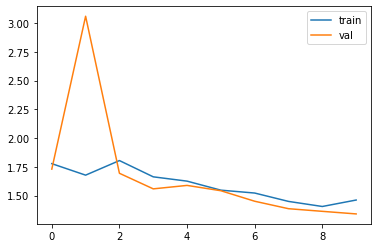

In [14]:
plt.plot(history['loss'], label = 'train')
plt.plot(history['val_loss'], label = 'val')
plt.legend()

In [15]:
res = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 57ms/step - loss: 1.3527 - accuracy: 0.5000


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 5, restore_best_weights = True)
model=load_own_model()
history = model.fit(X_train, y_train,
          epochs = 50,
          batch_size = 32,
          callbacks = [es],
          validation_data = (X_val, y_val)).history

Epoch 1/50
21/21 [==============================] - 2s 49ms/step - loss: 1.7716 - accuracy: 0.2198 - val_loss: 1.7454 - val_accuracy: 0.1522
Epoch 2/50
21/21 [==============================] - 1s 34ms/step - loss: 1.7059 - accuracy: 0.2570 - val_loss: 1.7070 - val_accuracy: 0.2500
Epoch 3/50
21/21 [==============================] - 1s 34ms/step - loss: 1.6261 - accuracy: 0.3065 - val_loss: 1.5912 - val_accuracy: 0.3152
Epoch 4/50
21/21 [==============================] - 1s 34ms/step - loss: 1.5348 - accuracy: 0.3622 - val_loss: 1.5406 - val_accuracy: 0.3098
Epoch 5/50
21/21 [==============================] - 1s 37ms/step - loss: 1.4837 - accuracy: 0.3808 - val_loss: 1.4744 - val_accuracy: 0.3804
Epoch 6/50
21/21 [==============================] - 1s 34ms/step - loss: 1.4111 - accuracy: 0.4675 - val_loss: 1.3784 - val_accuracy: 0.4402
Epoch 7/50
21/21 [==============================] - 1s 34ms/step - loss: 1.3938 - accuracy: 0.4226 - val_loss: 1.2675 - val_accuracy: 0.5163
Epoch 8/50
21

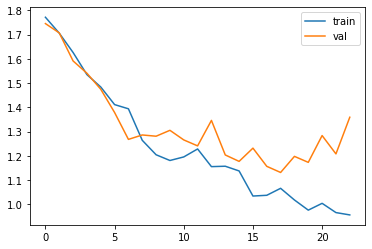

In [17]:
plt.plot(history['loss'], label = 'train')
plt.plot(history['val_loss'], label = 'val')
plt.legend()

In [18]:
res = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 15ms/step - loss: 1.1070 - accuracy: 0.5870


In [19]:
test_accuracy = res[-1]
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

test_accuracy = 59.0 %


**Using a pre-trained CNN = Transfer learning**

**VGG16 MODEL**

LOAD THE MODEL

In [20]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    
    vgg = VGG16(include_top=False, input_shape = (256, 256, 3))

    vgg.trainable = False

    model = Sequential([
        layers.RandomZoom(0.1,input_shape = (256, 256, 3)),
        layers.RandomFlip('horizontal'),
        layers.RandomContrast((0.1,0.2)),

        vgg,
        Flatten(),
        Dense(100, activation = 'relu'),
        Dropout(0.4),
        Dense(6, activation = 'softmax')   

    ])

    model.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(0.000005),
                metrics = ['accuracy'])
    
    return model

In [21]:
model = load_model()
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_zoom_2 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 random_contrast (RandomCont  (None, 256, 256, 3)      0         
 rast)                                                           
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 100)               

PREPROCESS THE DATA

In [22]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [23]:
X_train_preproc = preprocess_input(X_train)
X_val_preproc = preprocess_input(X_val)
X_test_preproc = preprocess_input(X_test)

In [24]:
X_train_preproc.shape

(646, 256, 256, 3)

In [25]:
y_train.shape

(646, 6)

FIT THE MODEL

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience = 5, restore_best_weights = True)

model = load_model()

history = model.fit(X_train_preproc, y_train,
          epochs = 100,
          batch_size = 32,
          callbacks = [es],
          validation_data = (X_val_preproc, y_val)).history

Epoch 1/100
21/21 [==============================] - 6s 203ms/step - loss: 14.7343 - accuracy: 0.1827 - val_loss: 7.9150 - val_accuracy: 0.2337
Epoch 2/100
21/21 [==============================] - 3s 138ms/step - loss: 13.1238 - accuracy: 0.1749 - val_loss: 6.6376 - val_accuracy: 0.2717
Epoch 3/100
21/21 [==============================] - 3s 138ms/step - loss: 11.0090 - accuracy: 0.2384 - val_loss: 5.8543 - val_accuracy: 0.3478
Epoch 4/100
21/21 [==============================] - 3s 138ms/step - loss: 9.3308 - accuracy: 0.2740 - val_loss: 5.3468 - val_accuracy: 0.3587
Epoch 5/100
21/21 [==============================] - 3s 138ms/step - loss: 7.8976 - accuracy: 0.3111 - val_loss: 4.8212 - val_accuracy: 0.3641
Epoch 6/100
21/21 [==============================] - 3s 138ms/step - loss: 7.0891 - accuracy: 0.3607 - val_loss: 4.4043 - val_accuracy: 0.3913
Epoch 7/100
21/21 [==============================] - 3s 139ms/step - loss: 6.8109 - accuracy: 0.3406 - val_loss: 4.0953 - val_accuracy: 0.4

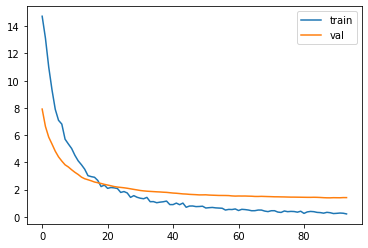

In [27]:
import matplotlib.pyplot as plt
plt.plot(history['loss'], label = 'train')
plt.plot(history['val_loss'], label = 'val')
plt.legend()

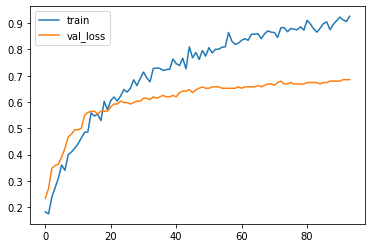

In [28]:
import matplotlib.pyplot as plt
plt.plot(history['accuracy'], label = 'train')
plt.plot(history['val_accuracy'], label = 'val_loss')
plt.legend()

In [29]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [30]:
model.save('drive/MyDrive/saved_model/my_model')

INFO:tensorflow:Assets written to: drive/MyDrive/saved_model/my_model/assets
